# Covid Timeseries Modelling

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
import numpy as np
import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [109]:
full_grouped = pd.read_csv('COVID-19-complete-new.csv', parse_dates=['Date'], index_col=0, header = 0)
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [161]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
35149,2020-07-28,West Bank and Gaza,10938,79,3752.0,7107.0,317,1,0
35150,2020-07-28,Western Sahara,10,1,8.0,1.0,0,0,0
35151,2020-07-28,Yemen,1703,484,840.0,379.0,12,1,7
35152,2020-07-28,Zambia,5002,142,3195.0,1665.0,450,2,380


In [110]:
canada = full_grouped[full_grouped['Country/Region'] == 'Canada']
canada.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
32,2020-01-22,Canada,0,0,0.0,0.0,0,0,0
218,2020-01-23,Canada,0,0,0.0,0.0,0,0,0
404,2020-01-24,Canada,0,0,0.0,0.0,0,0,0
590,2020-01-25,Canada,0,0,0.0,0.0,0,0,0
776,2020-01-26,Canada,1,0,0.0,1.0,1,0,0


In [111]:
# canada[['Date', 'New cases']]
daily_cases = canada.drop(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New deaths', 'New recovered'],axis=1)  
daily_cases.shape
# df.drop(['B', 'C'], axis=1)

(189, 2)

In [112]:
# daily_cases = canada[['Date', 'New cases']]
daily_cases.head()

,Date,New cases
32,2020-01-22,0
218,2020-01-23,0
404,2020-01-24,0
590,2020-01-25,0
776,2020-01-26,1


In [113]:
daily_cases.isnull().sum().sum()

0

In [114]:
daily_cases = daily_cases.set_index('Date')
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

,New cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1


In [40]:
# series.reset_index(drop=True, inplace=True)

In [115]:
daily_cases.shape

(189, 1)

## Moving Average

1. Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Date
2020-01-22         NaN
2020-01-23         NaN
2020-01-24    0.000000
2020-01-25    0.000000
2020-01-26    0.333333
2020-01-27    0.333333
2020-01-28    0.666667
2020-01-29    0.333333
2020-01-30    0.333333
2020-01-31    0.666667
Name: New cases, dtype: float64


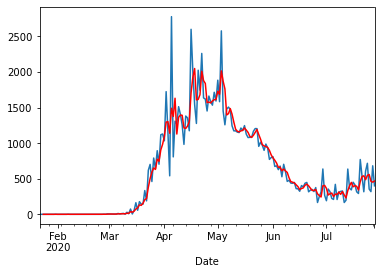

In [43]:
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

In [56]:
# rolling_mean.drop[index=[0,1]]

# LSTM

In [116]:
daily_cases

,New cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1
...,...
2020-07-24,717
2020-07-25,355
2020-07-26,319


In [123]:
daily_cases.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28'],
              dtype='datetime64[ns]', name='Date', length=189, freq=None)

In [118]:
test_data_size = 47
train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]
train_data.shape

(142, 1)

In [121]:
# test_data

In [126]:
scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data['New cases'], axis=1))
train_data = scaler.transform(np.expand_dims(train_data['New cases'], axis=1))
test_data = scaler.transform(np.expand_dims(test_data['New cases'], axis=1))

In [137]:
train_data[:10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00035997],
       [0.        ],
       [0.00035997],
       [0.        ],
       [0.        ],
       [0.00071994]])

In [138]:
test_data[:10]

array([[0.15694744],
       [0.1612671 ],
       [0.1299496 ],
       [0.12922966],
       [0.11663067],
       [0.14542837],
       [0.13894888],
       [0.15730742],
       [0.1612671 ],
       [0.1137509 ]])

In [130]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [131]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [132]:
X_train.shape

torch.Size([136, 5, 1])

In [133]:
X_train[:2]

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0004]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0004],
         [0.0000]]])

In [134]:
y_train.shape

torch.Size([136, 1])

In [135]:
y_train[:2]

tensor([[0.0000],
        [0.0004]])

In [139]:
X_test.shape

torch.Size([41, 5, 1])

In [140]:
X_test[:2]

tensor([[[0.1569],
         [0.1613],
         [0.1299],
         [0.1292],
         [0.1166]],

        [[0.1613],
         [0.1299],
         [0.1292],
         [0.1166],
         [0.1454]]])

In [141]:
y_test.shape

torch.Size([41, 1])

In [142]:
y_test[:2]

tensor([[0.1454],
        [0.1389]])

In [143]:
class CoronaVirusPredictor(nn.Module):
  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()
    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers
    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )
    self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    
  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )
    
  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [144]:
def train_model(
  model,
  train_data,
  train_labels,
  test_data=None,
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
    
  num_epochs = 60

  train_hist = np.zeros(num_epochs)
    
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()
    y_pred = model(X_train)
    loss = loss_fn(y_pred.float(), y_train)
    
    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()
      if t % 10 == 0:
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')
    train_hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
  return model.eval(), train_hist, test_hist

In [145]:
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model,
  X_train,
  y_train,
  X_test,
  y_test
)

Epoch 0 train loss: 16.645618438720703 test loss: 0.6947379112243652
Epoch 10 train loss: 8.479894638061523 test loss: 0.691612958908081
Epoch 20 train loss: 8.348400115966797 test loss: 0.748273491859436
Epoch 30 train loss: 7.849421501159668 test loss: 4.148871898651123
Epoch 40 train loss: 7.680075168609619 test loss: 2.2473833560943604
Epoch 50 train loss: 6.462460994720459 test loss: 6.1110711097717285


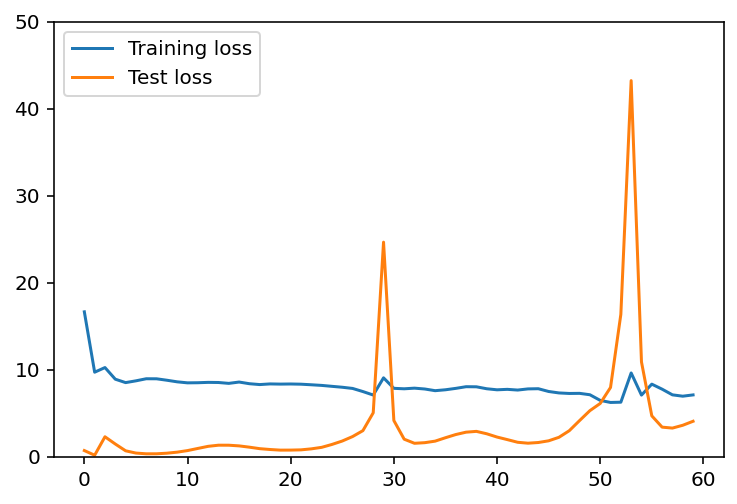

In [149]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 50))
plt.legend();

# Daily Cases Prediction

In [150]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [151]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

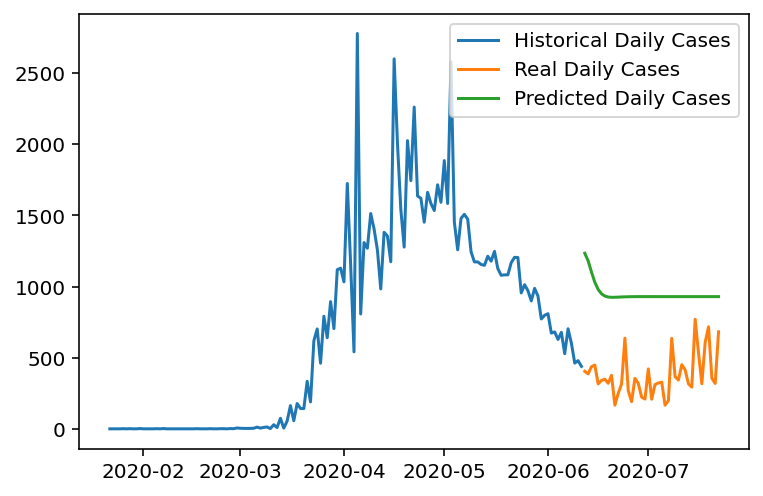

In [152]:
plt.plot(
  daily_cases.index[:len(train_data)],
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)
plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  true_cases,
  label='Real Daily Cases'
)
plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  predicted_cases,
  label='Predicted Daily Cases'
)
plt.legend();

## Using All Data for Training

In [153]:
scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(daily_cases['New cases'], axis=1))
all_data = scaler.transform(np.expand_dims(daily_cases['New cases'], axis=1))
all_data.shape

(189, 1)

In [154]:
X_all, y_all = create_sequences(all_data, seq_length)
X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 19.407032012939453
Epoch 10 train loss: 8.38928508758545
Epoch 20 train loss: 8.193784713745117
Epoch 30 train loss: 7.0478644371032715
Epoch 40 train loss: 8.57426643371582
Epoch 50 train loss: 9.175766944885254


In [155]:
DAYS_TO_PREDICT = 12

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []

  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [156]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [157]:
daily_cases.index[-1]

Timestamp('2020-07-28 00:00:00')

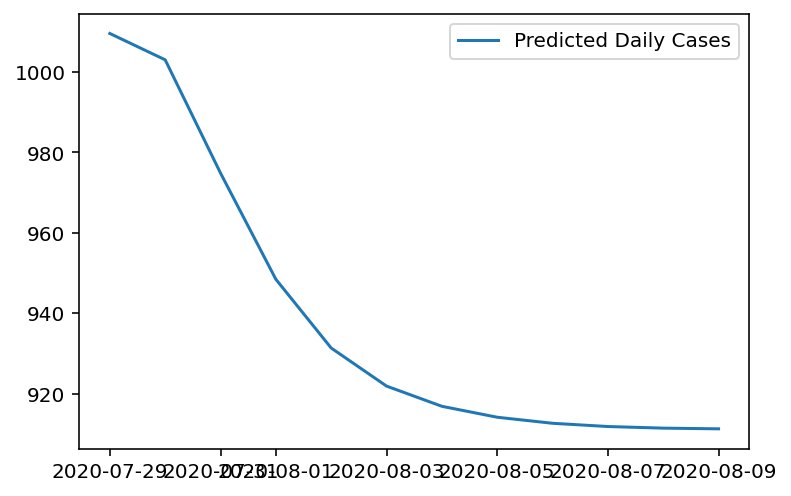

In [158]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)
predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [162]:
predicted_cases

2020-07-29    1009.557771
2020-07-30    1003.008352
2020-07-31     974.838517
2020-08-01     948.429973
2020-08-02     931.328695
2020-08-03     921.863879
2020-08-04     916.836819
2020-08-05     914.113331
2020-08-06     912.612002
2020-08-07     911.805784
2020-08-08     911.405242
2020-08-09     911.231961
Freq: D, dtype: float64

In [ ]:
fig = px.line(canada, x="Date", y="New cases", title='Daily new Cases in Canada')
fig.show()

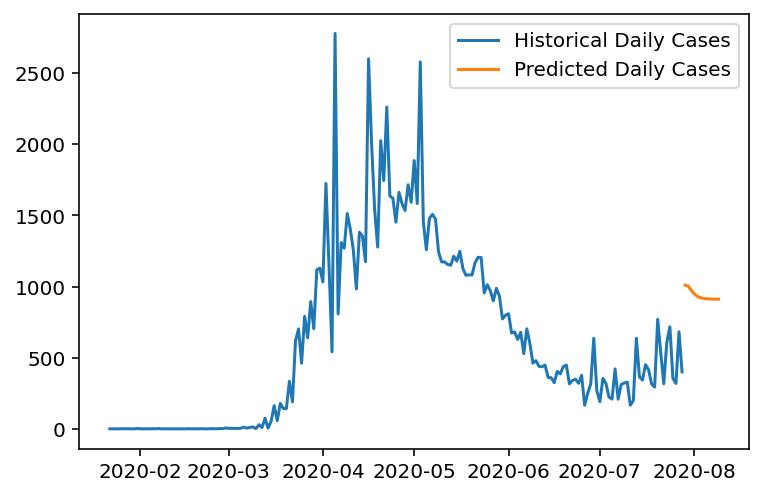

In [159]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();